### This is a test for adding padding and new DFT lengths


In [2]:
import numpy as np
from scipy.signal import chirp, spectrogram
import simpleaudio as sa
from scipy.io.wavfile import write, read
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from transmitter import *
from reciever import *
import random

In [3]:
fs = 44100
class OFDM:
    pass
ofdm = OFDM()
ofdm.N = 2048                   # Length of DTF
ofdm.start_bin = 50
ofdm.end_bin = 788
ofdm.CP = 256                      
ofdm.sfp = 20                   # Symbols per frame

ofdm.num_tones = 21              # Number of pilot tones
ofdm.pilot_locs = np.int64(np.linspace(49,789,ofdm.num_tones))     # Pilot locations
ofdm.pilot_vals = np.array([1+1j]*21)

ofdm.bps = 2                    # bits per symbol QFSK
ofdm.spb = 720                  # data symbols per block
ofdm.preamb = ofdm.N//2
ofdm.QFSK_dict = {              # The constellation
    (1,1) : -1-1j,
    (1,0) :  1-1j,
    (0,0) :  1+1j,
    (0,1) : -1+1j}

ofdm.pilot_locs

array([ 49,  86, 123, 160, 197, 234, 271, 308, 345, 382, 419, 456, 493,
       530, 567, 604, 641, 678, 715, 752, 789])

In [3]:
        ### Data forming With image
bit_array = bitsFromTiff('jaguar.tiff')

        ### Data from text
#bit_array = 
print('Length of bits', len(bit_array)/8)


payload = fullTrans(bit_array, ofdm)
#flat_payload = payload.flatten() / np.max(np.abs(payload.flatten()))
print("payload shape:",np.shape(payload))


        ### Pilot symbol for channel estimation
qfsk = np.array(list(ofdm.QFSK_dict.values()))
pilot_block = np.random.choice(qfsk, size=21, replace=True)
print(pilot_block.shape)
pilot_symbs = goodSymbols(pilot_block, ofdm)
pilot_full = addGuard(inversedft(pilot_symbs), ofdm)
pilot_full = pilot_full.flatten() / np.max(np.abs(pilot_full.flatten()))


        ### Chirp makeing for sync
chirp_time = 5*(ofdm.N+ofdm.CP) / fs
t = np.linspace(0, chirp_time, int(chirp_time * fs), False)
note = chirp(t, f0=500, f1=15000, t1=chirp_time, method='linear')
chirp_symbol = note / np.max(np.abs(note))

Length of bits 26800.0
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
309
310
311
312
31

/Users/metehergul/Cambridge Engineering IIA/GF3/gf3_v2/transmitter.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  plted[i-1] = ofdm.pilot_vals[pi]
/Users/metehergul/Cambridge Engineering IIA/GF3/gf3_v2/transmitter.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  plted[i-1] = data[di]



515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771

IndexError: invalid index to scalar variable.

In [4]:
plt.plot(payload.flatten()[50000:51000])
x = deconstruct(payload.flatten(), ofdm, numpy_func = True, channel_H = None, retSymbs = False)
bitsToSaveImage(x[:214400], 'trialpayload', 67, 100)

NameError: name 'payload' is not defined

In [5]:
emtpy = np.zeros(ofdm.N)

frame = frameMaker(chirp_symbol, pilot_full, payload, ofdm.ofdmSymbolsPerFrame, zeros_post_sync=emtpy, zeros_post_sybm=emtpy)
print("Frame Shape:",np.shape(frame))
audio_for_file = audioMaker(frame, 'multiframetest1', fs)

print("audio file length (samples, seconds):",len(audio_for_file), len(audio_for_file)*1/fs)

NameError: name 'chirp_symbol' is not defined

In [6]:
plt.figure(figsize = (30, 10))
plt.plot(audio_for_file[7500:12000])
print('Length of audio:',len(audio_for_file))
print('Expected length of audio:', (len(payload[0:5].flatten())+len(chirp_symbol)+len(emtpy)*2+len(pilot_full)))
print('Expected length of audio:', len(payload.flatten())+len(chirp_symbol)*42+len(emtpy)*42*2)

NameError: name 'audio_for_file' is not defined

<Figure size 2160x720 with 0 Axes>

In [7]:
record(18,fs,'big_frame_image') 

KeyboardInterrupt: 

In [ ]:
Fs, aud = read('big_frame_image.wav')

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=fs)
plt.show()

In [ ]:
plt.plot(np.correlate(aud, chirp_symbol, mode='full')[109200:109400])

In [9]:
x = bitsFromTxt('jabberwocky.txt')
# bitsFromTiff('jaguar.tiff')

bitArrayToText(x)

'Twas brillig, and the slithy toves
Did gyre and gimble in the wabe:
All mimsy were the borogoves,
And the mome raths outgrabe.

"Beware the Jabberwock, my son!
The jaws that bite, the claws that catch!
Beware the Jubjub bird, and shun
The frumious Bandersnatch!"

He took his vorpal sword in hand;
Long time the manxome foe he sought-
So rested he by the Tumtum tree
And stood awhile in thought.

And, as in uffish thought he stood,
The Jabberwock, with eyes of flame,
Came whiffling through the tulgey wood,
And burbled as it came!

One, two! One, two! And through and through
The vorpal blade went snicker-snack!
He left it dead, and with its head
He went galumphing back.

"And hast thou slain the Jabberwock?
Come to my arms, my beamish boy!
O frabjous day! Callooh! Callay!"
He chortled in his joy.

'Twas brillig, and the slithy toves
Did gyre and gimble in the wabe:
All mimsy were the borogoves,
And the mome raths outgrabe.


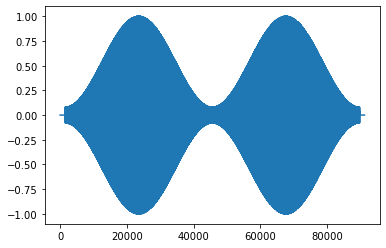

In [4]:
plt.plot(double_chirp())

In [5]:
ofdm.pilot_locs

array([ 49,  86, 123, 160, 197, 234, 271, 308, 345, 382, 419, 456, 493,
       530, 567, 604, 641, 678, 715, 752, 789])

In [6]:
import scipy

In [28]:
pilot_test = addpilots(np.zeros(720), ofdm)

scipy.signal.find_peaks(pilot_test)

(array([ 48,  85, 122, 159, 196, 233, 270, 307, 344, 381, 418, 455, 492,
        529, 566, 603, 640, 677, 714, 751, 788]),
 {})

In [77]:
gs = goodSymbols([np.zeros(720)], ofdm)[0]

print(gs[:100])
# goodSymbols fucks things up here.

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+1.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+1.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [146]:
tds = ifft(gs, 2048)
tds.shape

(2048,)

In [147]:
fds = fft(tds, int(2048))
fds.shape

(2048,)

In [148]:
fds[70:95]

array([ 1.16470135e-18-6.98020165e-17j,  3.28218981e-18-1.47569663e-17j,
        1.69170491e-17-9.76328480e-18j,  2.62848193e-17-8.27282600e-18j,
        8.93597798e-18-5.23199455e-17j, -2.51872330e-17-1.58667095e-17j,
       -3.00399386e-17-4.13800471e-17j, -1.68352023e-17+3.53289839e-17j,
        7.87886520e-18-2.43663452e-17j, -5.15277525e-17-6.28545350e-17j,
        1.58987673e-18+2.77935221e-17j,  2.64985978e-17-1.76784008e-17j,
        8.19426790e-17-2.29657077e-17j,  1.27237345e-17-1.05774041e-17j,
        4.18634353e-17-1.47744045e-18j,  2.67896975e-17-3.10789238e-17j,
        1.00000000e+00+1.00000000e+00j, -1.66138991e-17+2.34800332e-17j,
        8.05634729e-18+1.04116453e-17j, -2.23575385e-17-1.15745137e-16j,
        9.72721684e-18+6.61260104e-17j,  5.85697748e-17-2.77601396e-17j,
        1.38777878e-16+8.32667268e-17j, -1.11022302e-16+0.00000000e+00j,
        3.83513124e-17-1.42271249e-17j])

In [149]:
def decoded_mag_phase(tds, ofdm):
    fds = fft(tds, int(ofdm.N))
    channel_mags = []
    channel_phases = []
    
    for i in range(len(fds)):
        if i in ofdm.pilot_locs:
            channel_mags.append(np.abs(fds[i]))
            channel_phases.append(np.angle(fds[i]))
    
    return np.array(channel_mags), np.array(channel_phases)


In [153]:
def channel_estimator(tds, ofdm, interval = np.linspace(0, 1023, 1024)):
    dcds, angles = decoded_mag_phase(tds, ofdm)
    angles = angles % np.pi
    adcd = np.abs(ofdm.pilot_vals)
    aangle = np.angle(ofdm.pilot_vals) % np.pi

    mag_fit = scipy.interpolate.CubicSpline(ofdm.pilot_locs, dcds / adcd)
    ang_fit = scipy.interpolate.CubicSpline(ofdm.pilot_locs, angles - aangle)

    mgf = mag_fit(interval)
    agf = ang_fit(interval)

    H_est = mgf * np.exp(1j*agf)

    return H_est

In [169]:
ce = channel_estimator(tds, ofdm)
ce[:50]

array([1.-1.59073190e-15j, 1.-1.52897208e-15j, 1.-1.46869043e-15j,
       1.-1.40987050e-15j, 1.-1.35249586e-15j, 1.-1.29655007e-15j,
       1.-1.24201669e-15j, 1.-1.18887930e-15j, 1.-1.13712145e-15j,
       1.-1.08672671e-15j, 1.-1.03767864e-15j, 1.-9.89960805e-16j,
       1.-9.43556771e-16j, 1.-8.98450102e-16j, 1.-8.54624360e-16j,
       1.-8.12063111e-16j, 1.-7.70749917e-16j, 1.-7.30668343e-16j,
       1.-6.91801953e-16j, 1.-6.54134310e-16j, 1.-6.17648979e-16j,
       1.-5.82329524e-16j, 1.-5.48159509e-16j, 1.-5.15122497e-16j,
       1.-4.83202053e-16j, 1.-4.52381740e-16j, 1.-4.22645122e-16j,
       1.-3.93975765e-16j, 1.-3.66357230e-16j, 1.-3.39773083e-16j,
       1.-3.14206887e-16j, 1.-2.89642207e-16j, 1.-2.66062606e-16j,
       1.-2.43451648e-16j, 1.-2.21792897e-16j, 1.-2.01069918e-16j,
       1.-1.81266274e-16j, 1.-1.62365528e-16j, 1.-1.44351246e-16j,
       1.-1.27206991e-16j, 1.-1.10916327e-16j, 1.-9.54628180e-17j,
       1.-8.08300279e-17j, 1.-6.70015206e-17j, 1.-5.39608602e-

In [154]:
def equaliser(tds, ofdm, interval = np.linspace(0, 1023, 1024)):
    H_est = channel_estimator(tds, ofdm, interval)

    fds = fft(tds, int(ofdm.N))[:int(ofdm.N / 2)]

    return fds / H_est

/Users/metehergul/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


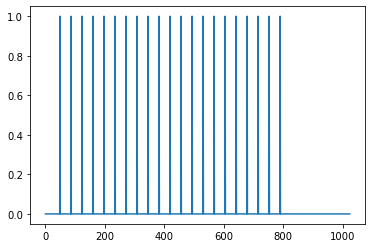

In [155]:
plt.plot(equaliser(tds,ofdm))

(2048,)


/Users/metehergul/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


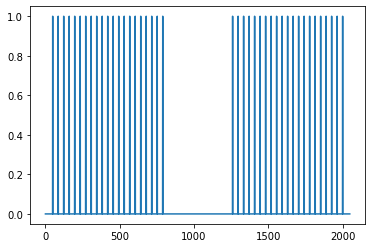

In [58]:
fds = fft(tds, 2048)
print(fds.shape)
plt.plot(fds)

(2048,)


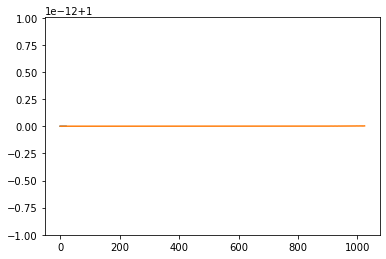

In [50]:
x = np.abs(decode(tds, ofdm))
plt.plot(x)

fit = scipy.interpolate.UnivariateSpline(ofdm.pilot_locs, x)

xs = np.linspace(0, 1024, 1025)
plt.plot(xs, fit(xs))
